# Settings Assert
------

In [5]:
!sudo apt-get update -y
!sudo apt-get install python3.10
!sudo apt-get install python3.10-distutils
!curl -sS https://bootstrap.pypa.io/get-pip.py | sudo python3.10

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease     
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease                 
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease               
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease                     
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease               
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease   
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry missp

In [1]:
!pip install torch==2.1.0 torchvision==0.16.0 tqdm==4.66.1 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.8.0 seaborn==0.13.0 wandb==0.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 98.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 106.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 101.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 107.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 99.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 M

In [61]:
import sys
import matplotlib
import torch
import torchvision
import matplotlib
import numpy
import sklearn
import seaborn

assert '.'.join(sys.version.split()[0].split('.')[:-1]) == '3.10'
assert torch.__version__.split('+')[0] == '2.1.0'
# assert matplotlib.__version__ == '3.8.0'
assert sklearn.__version__ == '1.5.2'
assert seaborn.__version__ == '0.13.0'

# Pipeline
-----

In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import random

In [64]:
data = pd.read_csv('/kaggle/input/bhw-1-dl-2024-2025/bhw1/labels.csv')

## DataLoader

In [65]:
from PIL import Image
from torch.utils.data.dataset import Dataset


class MyDataLoader(Dataset):

    def __init__(self, transform = None, path = None, target_path = None, indices = None):

        assert target_path is not None

        self.target = pd.read_csv(target_path)
        self.target = self.target.iloc[indices, :] if indices is not None else self.target
        self.transform = transform

        assert path is not None

        self.path = path

    def __len__(self):
        return self.target.shape[0]

    def __getitem__(self, index):

        object = self.target.iloc[index, :]
        img, target = Image.open(self.path + object.Id), object.Category

        if self.transform is not None:
            img = self.transform(img)

        return img, target


## Augmentations

In [79]:
from torchvision.transforms import v2
from torchvision.transforms.v2 import RandAugment, RandomErasing

cutmix = v2.CutMix(num_classes=200, alpha=0.5)
mixup = v2.MixUp(num_classes=200, alpha=0.5)
cutmix_or_mixup = v2.RandomChoice([cutmix, mixup])

train_transform = v2.Compose([
    v2.RandomResizedCrop(40, scale=(0.8, 1.0)),  
    v2.RandomHorizontalFlip(), 
    RandAugment(num_ops=3, magnitude=6),
    v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),  
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
    RandomErasing(p=0.3, scale=(0.02, 0.1), ratio=(0.3, 3.3), value=0), 
])

val_transform = v2.Compose([
    v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),  
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Train / Val split

In [80]:
train_path = '/kaggle/input/bhw-1-dl-2024-2025/bhw1/trainval/'
target_train = '/kaggle/input/bhw-1-dl-2024-2025/bhw1/labels.csv'

tr_idx, val_idx = train_test_split(np.arange(data.shape[0]), test_size=0.2,
                                            shuffle=True, random_state=42)

In [81]:
train_sample = MyDataLoader(transform=train_transform, path=train_path, 
                            target_path=target_train, indices = tr_idx)

val_sample = MyDataLoader(transform=val_transform, path=train_path, 
                            target_path=target_train, indices = val_idx)

In [82]:
train_sample = DataLoader(train_sample, batch_size=64, shuffle=True, num_workers=4)
val_sample = DataLoader(val_sample, batch_size=64, shuffle=False, num_workers=4)


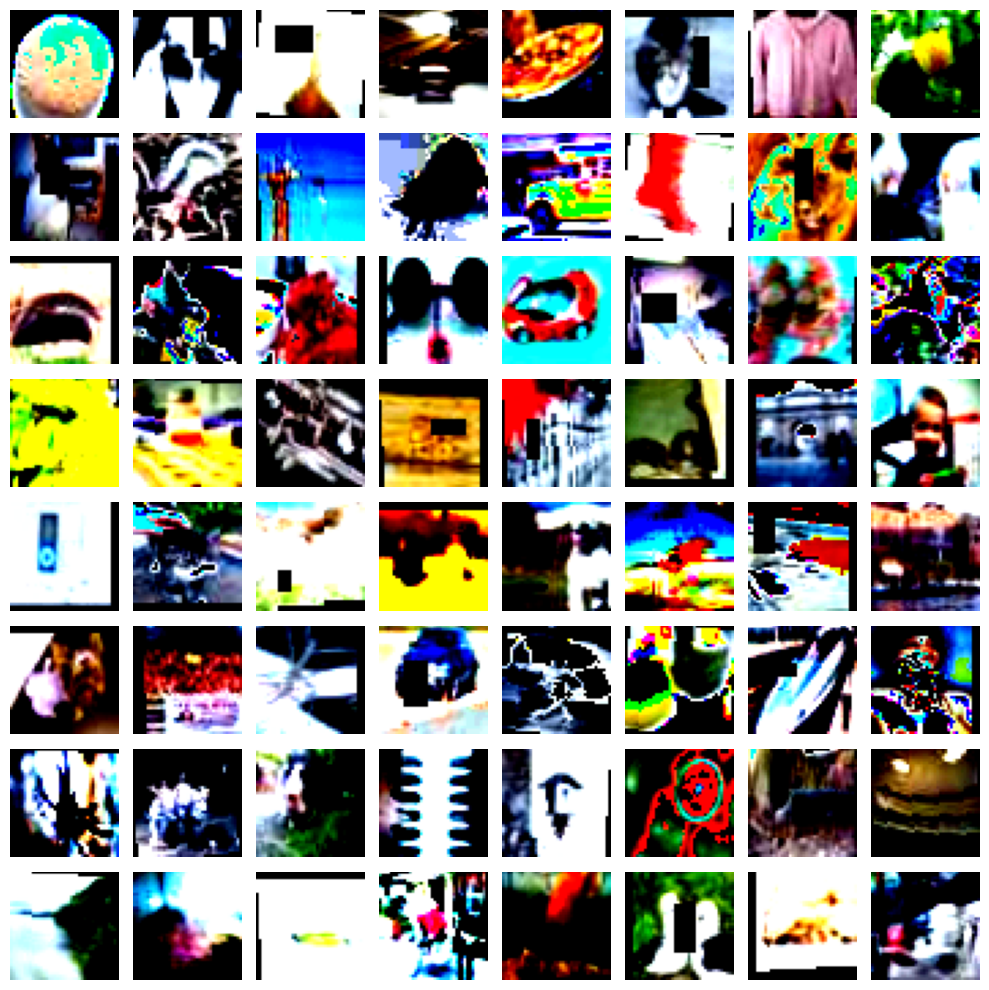

In [83]:
def displayBatchImages(train_loader):

    images, labels = next(iter(train_loader))

    images = images.permute(0, 2, 3, 1) 

    fig, axes = plt.subplots(8, 8, figsize=(10, 10))
    axes = axes.flatten()  

    for i in range(64):
        
        axes[i].imshow(images[i].numpy())
        axes[i].axis('off') 

    plt.tight_layout()
    plt.show()

displayBatchImages(train_sample)

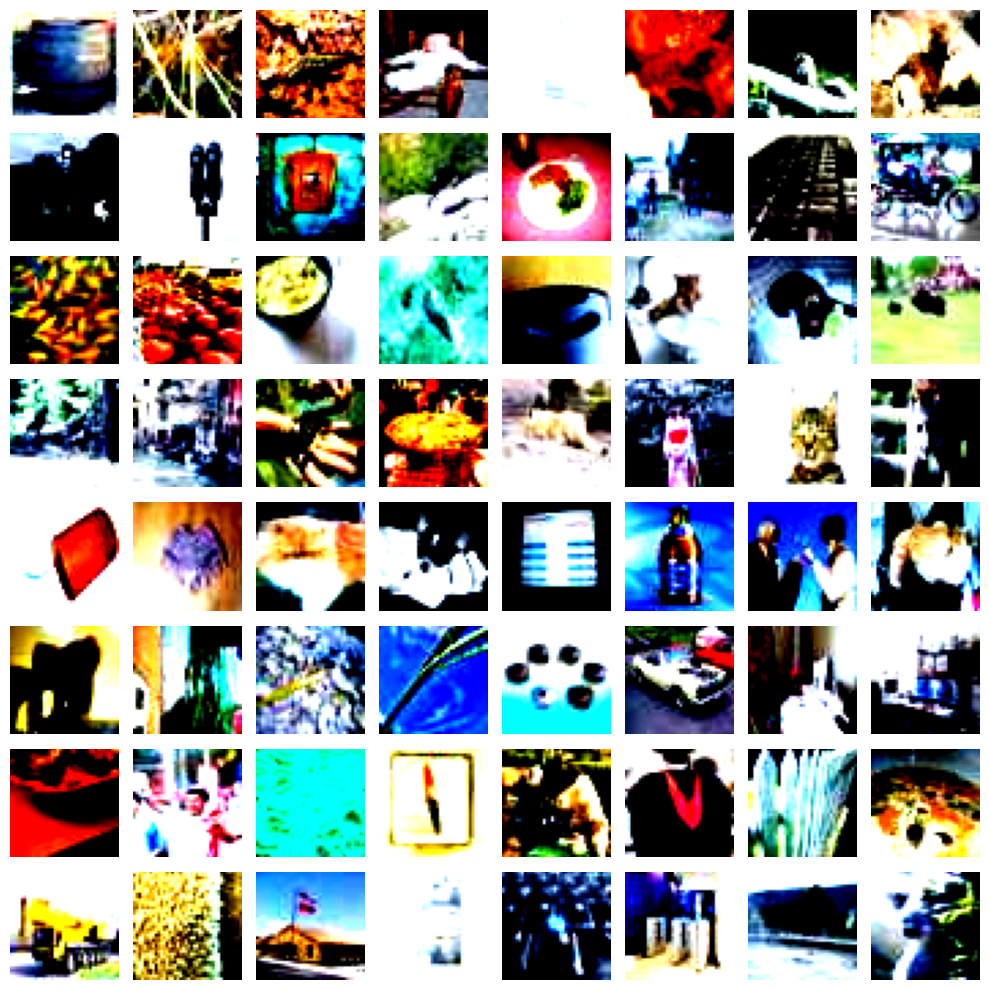

In [84]:
displayBatchImages(val_sample)

## Fitting pipeline

In [85]:
import tqdm
import time
import os

best_record = ''

def test(model, loader):
    loss_log = []
    acc_log = []
    model.eval()
    
    for data, target in loader:
        
        data, target = data.to(device), target.to(device)
        
        pred = model(data)
        
        loss = nn.CrossEntropyLoss()(pred, target)
        
        loss_log.append(loss.item())
        
        acc = (pred.argmax(axis = -1) == target).float().mean()
        
        acc_log.append(acc.item()) 
        
    return np.mean(loss_log), np.mean(acc_log)

def train_epoch(model, optimizer, train_loader):
    loss_log = []
    acc_log = []
    
    criterion = nn.CrossEntropyLoss(label_smoothing = 0.1)
    
    model.train()
    
    for data, target in train_loader:
        
        data, target = data.to(device), target.to(device)

        data, target = cutmix_or_mixup(data, target)
        target = target.argmax(axis=1)
        
        pred = model(data)
        loss = criterion(pred, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_log.append(loss.item())
        
        acc = (pred.argmax(axis = -1) == target).float().mean()
        
        acc_log.append(acc.item()) 

    return loss_log, acc_log

def train(model, optimizer, n_epochs, train_loader, val_loader, scheduler=None):

    global best_record
    
    train_loss_log, train_acc_log, val_loss_log, val_acc_log = [], [], [], []

    best_acc = -np.inf

    for epoch in tqdm.tqdm(range(n_epochs)):
        
        train_loss, train_acc = train_epoch(model, optimizer, train_loader)
        val_loss, val_acc = test(model, val_loader)
        
        train_loss_log.extend(train_loss)
        train_acc_log.extend(train_acc)
        
        val_loss_log.append(val_loss)
        val_acc_log.append(val_acc)

        print(f"Epoch {epoch}")
        print(f" train loss: {np.mean(train_loss)}, train acc: {np.mean(train_acc)}")
        print(f" val loss: {val_loss}, val acc: {val_acc}\n")
        
        if scheduler is not None:
            
            if type(scheduler).__name__ == 'ReduceLROnPlateau':
                scheduler.step(val_loss)
            
            else:
                scheduler.step()

        end_epoch = time.time()

        torch.save({
                        'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),
                        'scheduler_state_dict': scheduler.state_dict(),
                        'train_loss': train_loss_log,
                        'train_acc': train_acc_log,
                        'val_loss': val_loss_log,
                        'val_acc_log': val_acc_log
                    }, 
                   'checkpoint.pth')

        if val_acc > best_acc:

            best_acc = val_acc

            if best_record != '':

                os.remove(f'/kaggle/working/{best_record}.pth')

            best_record = f'acc_{str(round(val_acc * 100, 2)).replace(".", "")}'
            
            torch.save({
                        'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),
                        'scheduler_state_dict': scheduler.state_dict(),
                        'train_loss': train_loss_log,
                        'train_acc': train_acc_log,
                        'val_loss': val_loss_log,
                        'val_acc_log': val_acc_log
                    }, 
                   f'{best_record}.pth')


    return train_loss_log, train_acc_log, val_loss_log, val_acc_log

## Architecure 

In [86]:
from torchvision import models

random.seed(52) 
np.random.seed(52)  
torch.manual_seed(52) 
torch.cuda.manual_seed_all(52) 


model = models.resnet34(weights=None)
model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
model.maxpool = nn.AdaptiveMaxPool2d((40,40))
model.fc = nn.Sequential(
    nn.Dropout(0.5), 
    nn.Linear(512, 200)
)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model = nn.DataParallel(model, device_ids=[0, 1])

optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)


tr_loss_log, tr_acc_log, val_loss_log, val_acc_log = train(model, optimizer, 100, train_sample, val_sample, scheduler)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0
 train loss: 5.215844597244263, train acc: 0.0159125
 val loss: 5.09016624883341, val acc: 0.02441094249201278



  1%|          | 1/100 [03:05<5:06:25, 185.71s/it]

Epoch 1
 train loss: 5.027646699142456, train acc: 0.0298375
 val loss: 4.5798059972330405, val acc: 0.06659345047923322



  2%|▏         | 2/100 [06:12<5:03:57, 186.09s/it]

Epoch 2
 train loss: 4.908155253982544, train acc: 0.0461125
 val loss: 4.3782090150510165, val acc: 0.0906050319488818



  3%|▎         | 3/100 [09:19<5:01:55, 186.76s/it]

Epoch 3
 train loss: 4.738194898986817, train acc: 0.0653
 val loss: 4.076839774561385, val acc: 0.12435103833865814



  4%|▍         | 4/100 [12:31<5:01:58, 188.73s/it]

Epoch 4
 train loss: 4.606173097419739, train acc: 0.086
 val loss: 3.8645145382744053, val acc: 0.1526058306709265



  5%|▌         | 5/100 [15:37<4:57:27, 187.87s/it]

Epoch 5
 train loss: 4.50526531715393, train acc: 0.1031875
 val loss: 3.7354256322208683, val acc: 0.17442092651757188



  6%|▌         | 6/100 [18:46<4:54:52, 188.22s/it]

Epoch 6
 train loss: 4.4403837882995605, train acc: 0.1148875
 val loss: 3.6029114273790355, val acc: 0.20012979233226838



  7%|▋         | 7/100 [21:52<4:50:41, 187.54s/it]

Epoch 7
 train loss: 4.350149252319336, train acc: 0.1309375
 val loss: 3.409066753265576, val acc: 0.2310802715654952



  8%|▊         | 8/100 [24:58<4:46:41, 186.97s/it]

Epoch 8
 train loss: 4.272957374954224, train acc: 0.1446625
 val loss: 3.3211498268115256, val acc: 0.2461561501597444



  9%|▉         | 9/100 [28:02<4:42:11, 186.06s/it]

Epoch 9
 train loss: 4.2329472131729124, train acc: 0.153375
 val loss: 3.2731466308569375, val acc: 0.2596845047923323



 10%|█         | 10/100 [31:06<4:38:06, 185.41s/it]

Epoch 10
 train loss: 4.180709794044494, train acc: 0.16505
 val loss: 3.2427989042605074, val acc: 0.2637779552715655



 11%|█         | 11/100 [34:09<4:33:57, 184.69s/it]

Epoch 11
 train loss: 4.130759358215332, train acc: 0.174825
 val loss: 3.181716036111021, val acc: 0.2778055111821086



 12%|█▏        | 12/100 [37:13<4:30:25, 184.38s/it]

Epoch 12
 train loss: 4.0790025318145755, train acc: 0.18575
 val loss: 3.083725746447286, val acc: 0.2939297124600639



 13%|█▎        | 13/100 [40:16<4:26:54, 184.07s/it]

Epoch 13
 train loss: 4.059387205886841, train acc: 0.19095
 val loss: 3.0255163652828325, val acc: 0.30451277955271566



 14%|█▍        | 14/100 [43:20<4:23:33, 183.88s/it]

Epoch 14
 train loss: 4.000198127555847, train acc: 0.2021125
 val loss: 2.9734112096670717, val acc: 0.31389776357827476



 15%|█▌        | 15/100 [46:24<4:20:34, 183.94s/it]

Epoch 15
 train loss: 3.9253143712997436, train acc: 0.217625
 val loss: 3.004830598069456, val acc: 0.3117012779552716



 16%|█▌        | 16/100 [49:27<4:17:28, 183.91s/it]

Epoch 16
 train loss: 3.9264685091018676, train acc: 0.2218
 val loss: 2.9054649538887194, val acc: 0.33082068690095845



 17%|█▋        | 17/100 [52:32<4:14:47, 184.19s/it]

Epoch 17
 train loss: 3.882918468093872, train acc: 0.22825
 val loss: 2.844778675621691, val acc: 0.34220247603833864



 18%|█▊        | 18/100 [55:35<4:11:08, 183.76s/it]

Epoch 18
 train loss: 3.8487044191360473, train acc: 0.239425
 val loss: 2.8315654242762363, val acc: 0.3490415335463259



 19%|█▉        | 19/100 [58:38<4:07:48, 183.56s/it]

Epoch 19
 train loss: 3.795764303970337, train acc: 0.248
 val loss: 2.7609726483829484, val acc: 0.3597244408945687



 20%|██        | 20/100 [1:01:42<4:04:39, 183.50s/it]

Epoch 20
 train loss: 3.7814616832733154, train acc: 0.2519125
 val loss: 2.77881606927695, val acc: 0.36446685303514376



 21%|██        | 21/100 [1:04:46<4:01:48, 183.65s/it]

Epoch 21
 train loss: 3.7469818181991577, train acc: 0.2585375
 val loss: 2.7833330501763585, val acc: 0.363069089456869



 22%|██▏       | 22/100 [1:07:49<3:58:38, 183.57s/it]

Epoch 22
 train loss: 3.725950188446045, train acc: 0.2646625
 val loss: 2.700521917769703, val acc: 0.3781948881789137



 23%|██▎       | 23/100 [1:10:52<3:55:19, 183.37s/it]

Epoch 23
 train loss: 3.7052796337127685, train acc: 0.271125
 val loss: 2.691862014916758, val acc: 0.38273761980830673



 24%|██▍       | 24/100 [1:13:55<3:52:16, 183.37s/it]

Epoch 24
 train loss: 3.661680037307739, train acc: 0.2809875
 val loss: 2.692468650424823, val acc: 0.3841353833865815



 25%|██▌       | 25/100 [1:17:04<3:51:10, 184.94s/it]

Epoch 25
 train loss: 3.6222929889678954, train acc: 0.2886875
 val loss: 2.5943312995350016, val acc: 0.3983126996805112



 26%|██▌       | 26/100 [1:20:11<3:48:54, 185.60s/it]

Epoch 26
 train loss: 3.6257269937515257, train acc: 0.28825
 val loss: 2.648488591273372, val acc: 0.38738019169329074



 27%|██▋       | 27/100 [1:23:17<3:46:08, 185.87s/it]

Epoch 27
 train loss: 3.5790199207305906, train acc: 0.30075
 val loss: 2.5996555786925004, val acc: 0.3995107827476038



 28%|██▊       | 28/100 [1:26:26<3:43:53, 186.58s/it]

Epoch 28
 train loss: 3.578560199356079, train acc: 0.3015875
 val loss: 2.536657676529199, val acc: 0.41014376996805113



 29%|██▉       | 29/100 [1:29:33<3:41:02, 186.79s/it]

Epoch 29
 train loss: 3.581872562599182, train acc: 0.3021375
 val loss: 2.61293977289535, val acc: 0.3995107827476038



 30%|███       | 30/100 [1:32:38<3:37:29, 186.42s/it]

Epoch 30
 train loss: 3.522469627761841, train acc: 0.31275
 val loss: 2.5283366159890024, val acc: 0.41184105431309903



 31%|███       | 31/100 [1:35:43<3:33:52, 185.98s/it]

Epoch 31
 train loss: 3.5162861043930054, train acc: 0.3163625
 val loss: 2.5545592586072488, val acc: 0.41333865814696485



 32%|███▏      | 32/100 [1:38:49<3:30:45, 185.96s/it]

Epoch 32
 train loss: 3.4955593116760255, train acc: 0.3201
 val loss: 2.5164593618137006, val acc: 0.4209764376996805



 33%|███▎      | 33/100 [1:41:55<3:27:25, 185.75s/it]

Epoch 33
 train loss: 3.455856129837036, train acc: 0.332525
 val loss: 2.488640303809803, val acc: 0.41902955271565495



 34%|███▍      | 34/100 [1:44:59<3:23:59, 185.45s/it]

Epoch 34
 train loss: 3.4105776155471803, train acc: 0.3419125
 val loss: 2.4720304061810427, val acc: 0.43006190095846647



 35%|███▌      | 35/100 [1:48:04<3:20:34, 185.15s/it]

Epoch 35
 train loss: 3.4006577848434447, train acc: 0.342275
 val loss: 2.4879598785132266, val acc: 0.42971246006389774



 36%|███▌      | 36/100 [1:51:08<3:17:17, 184.96s/it]

Epoch 36
 train loss: 3.3785237432479858, train acc: 0.350375
 val loss: 2.423756177813862, val acc: 0.434754392971246



 37%|███▋      | 37/100 [1:54:13<3:14:13, 184.97s/it]

Epoch 37
 train loss: 3.3599311616897585, train acc: 0.3539125
 val loss: 2.4342887885273456, val acc: 0.43465455271565495



 38%|███▊      | 38/100 [1:57:17<3:10:51, 184.70s/it]

Epoch 38
 train loss: 3.3419636173248293, train acc: 0.35985
 val loss: 2.4020407302691913, val acc: 0.44309105431309903



 39%|███▉      | 39/100 [2:00:22<3:07:38, 184.57s/it]

Epoch 39
 train loss: 3.306850418281555, train acc: 0.3668625
 val loss: 2.43958721945461, val acc: 0.43545327476038337



 40%|████      | 40/100 [2:03:25<3:04:19, 184.32s/it]

Epoch 40
 train loss: 3.314402384185791, train acc: 0.365075
 val loss: 2.4540389882870755, val acc: 0.4347044728434505



 41%|████      | 41/100 [2:06:31<3:01:38, 184.72s/it]

Epoch 41
 train loss: 3.299706303215027, train acc: 0.3684625
 val loss: 2.367466767755941, val acc: 0.4468849840255591



 42%|████▏     | 42/100 [2:09:37<2:58:59, 185.17s/it]

Epoch 42
 train loss: 3.2651493003845213, train acc: 0.376975
 val loss: 2.4084260494183427, val acc: 0.44349041533546324



 43%|████▎     | 43/100 [2:12:43<2:56:02, 185.30s/it]

Epoch 43
 train loss: 3.2449985151290894, train acc: 0.3811375
 val loss: 2.426560896273238, val acc: 0.4415934504792332



 44%|████▍     | 44/100 [2:15:48<2:52:48, 185.15s/it]

Epoch 44
 train loss: 3.197265110206604, train acc: 0.39245
 val loss: 2.398594410274737, val acc: 0.44973043130990414



 45%|████▌     | 45/100 [2:18:54<2:49:54, 185.36s/it]

Epoch 45
 train loss: 3.2200281562805175, train acc: 0.3871
 val loss: 2.4068068197360053, val acc: 0.448482428115016



 46%|████▌     | 46/100 [2:21:59<2:46:54, 185.45s/it]

Epoch 46
 train loss: 3.186566630935669, train acc: 0.3959375
 val loss: 2.3742607157832136, val acc: 0.4526257987220447



 47%|████▋     | 47/100 [2:25:07<2:44:21, 186.06s/it]

Epoch 47
 train loss: 3.177386522293091, train acc: 0.3988625
 val loss: 2.3744639082076833, val acc: 0.45002995207667734



 48%|████▊     | 48/100 [2:28:12<2:40:56, 185.70s/it]

Epoch 48
 train loss: 3.147488112449646, train acc: 0.404175
 val loss: 2.3665876323803543, val acc: 0.45761781150159747



 49%|████▉     | 49/100 [2:31:18<2:38:04, 185.98s/it]

Epoch 49
 train loss: 3.166710425186157, train acc: 0.403375
 val loss: 2.4232981608698543, val acc: 0.44738418530351437



 50%|█████     | 50/100 [2:34:24<2:34:52, 185.85s/it]

Epoch 50
 train loss: 3.083786263656616, train acc: 0.42215
 val loss: 2.328784857314235, val acc: 0.4656050319488818



 51%|█████     | 51/100 [2:37:30<2:31:53, 185.98s/it]

Epoch 51
 train loss: 3.0937166578292845, train acc: 0.42
 val loss: 2.410270912959553, val acc: 0.44988019169329074



 52%|█████▏    | 52/100 [2:40:34<2:28:16, 185.34s/it]

Epoch 52
 train loss: 3.047090505027771, train acc: 0.431975
 val loss: 2.3887005431202653, val acc: 0.45437300319488816



 53%|█████▎    | 53/100 [2:43:36<2:24:32, 184.52s/it]

Epoch 53
 train loss: 3.051530092906952, train acc: 0.430275
 val loss: 2.366223809818109, val acc: 0.45492212460063897



 54%|█████▍    | 54/100 [2:46:43<2:21:53, 185.07s/it]

Epoch 54
 train loss: 3.011458859157562, train acc: 0.4400125
 val loss: 2.3507956308297837, val acc: 0.4601637380191693



 55%|█████▌    | 55/100 [2:49:49<2:19:04, 185.43s/it]

Epoch 55
 train loss: 3.0222592759132385, train acc: 0.4364
 val loss: 2.391660746674949, val acc: 0.44898162939297126



 56%|█████▌    | 56/100 [2:52:53<2:15:44, 185.10s/it]

Epoch 56
 train loss: 3.010174213027954, train acc: 0.442775
 val loss: 2.4081158040049737, val acc: 0.4511281948881789



 57%|█████▋    | 57/100 [2:55:57<2:12:25, 184.78s/it]

Epoch 57
 train loss: 2.9891069961547854, train acc: 0.4483375
 val loss: 2.3716452418805694, val acc: 0.4619608626198083



 58%|█████▊    | 58/100 [2:59:06<2:10:07, 185.89s/it]

Epoch 58
 train loss: 2.9717382849693297, train acc: 0.4513875
 val loss: 2.361277290045644, val acc: 0.46390774760383385



 59%|█████▉    | 59/100 [3:02:14<2:07:24, 186.46s/it]

Epoch 59
 train loss: 2.9677218482017516, train acc: 0.4529875
 val loss: 2.375365658309132, val acc: 0.45796725239616615



 60%|██████    | 60/100 [3:05:19<2:04:09, 186.23s/it]

Epoch 60
 train loss: 2.9406542532920836, train acc: 0.458275
 val loss: 2.333574810347999, val acc: 0.4630591054313099



 61%|██████    | 61/100 [3:08:23<2:00:32, 185.45s/it]

Epoch 61
 train loss: 2.9231374946594237, train acc: 0.465
 val loss: 2.387607580556656, val acc: 0.46181110223642174

Epoch 00062: reducing learning rate of group 0 to 1.0000e-04.


 62%|██████▏   | 62/100 [3:11:27<1:57:13, 185.10s/it]

Epoch 62
 train loss: 2.7816747044563295, train acc: 0.49925
 val loss: 2.2794087477766287, val acc: 0.48127995207667734



 63%|██████▎   | 63/100 [3:14:38<1:55:06, 186.65s/it]

Epoch 63
 train loss: 2.7098119356155395, train acc: 0.5187125
 val loss: 2.2929843972666193, val acc: 0.48312699680511184



 64%|██████▍   | 64/100 [3:17:44<1:51:59, 186.66s/it]

Epoch 64
 train loss: 2.685479389667511, train acc: 0.524175
 val loss: 2.2700957813963725, val acc: 0.48242811501597443



 65%|██████▌   | 65/100 [3:20:54<1:49:21, 187.47s/it]

Epoch 65
 train loss: 2.6922381779670714, train acc: 0.521675
 val loss: 2.2580874449909687, val acc: 0.48432507987220447



 66%|██████▌   | 66/100 [3:24:01<1:46:17, 187.59s/it]

Epoch 66
 train loss: 2.6610039412498474, train acc: 0.5312125
 val loss: 2.258781331034895, val acc: 0.4858726038338658



 67%|██████▋   | 67/100 [3:27:09<1:43:10, 187.58s/it]

Epoch 67
 train loss: 2.646297461795807, train acc: 0.534375
 val loss: 2.271159089030549, val acc: 0.48262779552715657



 68%|██████▊   | 68/100 [3:30:15<1:39:42, 186.95s/it]

Epoch 68
 train loss: 2.6086237454414367, train acc: 0.543225
 val loss: 2.276126934697453, val acc: 0.4823781948881789



 69%|██████▉   | 69/100 [3:33:19<1:36:15, 186.30s/it]

Epoch 69
 train loss: 2.6232548871994017, train acc: 0.542575
 val loss: 2.2653925274126827, val acc: 0.48612220447284343



 70%|███████   | 70/100 [3:36:25<1:33:02, 186.09s/it]

Epoch 70
 train loss: 2.6172038643836975, train acc: 0.5416
 val loss: 2.2770565988156743, val acc: 0.48113019169329074



 71%|███████   | 71/100 [3:39:30<1:29:45, 185.70s/it]

Epoch 71
 train loss: 2.586767879486084, train acc: 0.5502375
 val loss: 2.2890658245299953, val acc: 0.48262779552715657



 72%|███████▏  | 72/100 [3:42:36<1:26:41, 185.77s/it]

Epoch 72
 train loss: 2.577643462944031, train acc: 0.554175
 val loss: 2.28310893328426, val acc: 0.4836261980830671



 73%|███████▎  | 73/100 [3:45:40<1:23:24, 185.35s/it]

Epoch 73
 train loss: 2.618363074874878, train acc: 0.5446375
 val loss: 2.2602264850665206, val acc: 0.48747004792332266



 74%|███████▍  | 74/100 [3:48:47<1:20:30, 185.81s/it]

Epoch 74
 train loss: 2.535458372783661, train acc: 0.5635625
 val loss: 2.2642538543707267, val acc: 0.489017571884984



 75%|███████▌  | 75/100 [3:51:52<1:17:17, 185.52s/it]

Epoch 75
 train loss: 2.5811138445854187, train acc: 0.5533875
 val loss: 2.2801754752667946, val acc: 0.48577276357827476



 76%|███████▌  | 76/100 [3:54:56<1:14:06, 185.29s/it]

Epoch 76
 train loss: 2.571723994255066, train acc: 0.5550375
 val loss: 2.28061393503183, val acc: 0.4848742012779553

Epoch 00077: reducing learning rate of group 0 to 1.0000e-05.


 77%|███████▋  | 77/100 [3:58:01<1:10:54, 184.96s/it]

Epoch 77
 train loss: 2.5470089873313904, train acc: 0.562
 val loss: 2.265494824979252, val acc: 0.4866214057507987



 78%|███████▊  | 78/100 [4:01:05<1:07:47, 184.91s/it]

Epoch 78
 train loss: 2.5874010048866274, train acc: 0.55435
 val loss: 2.2593312149230664, val acc: 0.4906150159744409



 79%|███████▉  | 79/100 [4:04:10<1:04:40, 184.80s/it]

Epoch 79
 train loss: 2.5604302253723144, train acc: 0.5591
 val loss: 2.2560964209584, val acc: 0.49011581469648563



 80%|████████  | 80/100 [4:07:14<1:01:30, 184.55s/it]

Epoch 80
 train loss: 2.534459417438507, train acc: 0.5638
 val loss: 2.256200729086757, val acc: 0.48921725239616615



 81%|████████  | 81/100 [4:10:18<58:22, 184.35s/it]  

Epoch 81
 train loss: 2.5687860836029053, train acc: 0.5557
 val loss: 2.2764804873603603, val acc: 0.48722044728434505



 82%|████████▏ | 82/100 [4:13:23<55:20, 184.47s/it]

Epoch 82
 train loss: 2.537619825935364, train acc: 0.563575
 val loss: 2.2606522880804043, val acc: 0.49091453674121405



 83%|████████▎ | 83/100 [4:16:28<52:20, 184.73s/it]

Epoch 83
 train loss: 2.5328079552650453, train acc: 0.5642
 val loss: 2.2752311557245712, val acc: 0.4875199680511182



 84%|████████▍ | 84/100 [4:19:33<49:16, 184.78s/it]

Epoch 84
 train loss: 2.5531748790740965, train acc: 0.56015
 val loss: 2.2794735888703563, val acc: 0.4874201277955272



 85%|████████▌ | 85/100 [4:22:38<46:13, 184.93s/it]

Epoch 85
 train loss: 2.548958010005951, train acc: 0.560925
 val loss: 2.269686230836204, val acc: 0.490814696485623



 86%|████████▌ | 86/100 [4:25:43<43:07, 184.82s/it]

Epoch 86
 train loss: 2.5460159028053284, train acc: 0.5640875
 val loss: 2.2794770440354513, val acc: 0.4874201277955272



 87%|████████▋ | 87/100 [4:28:46<39:58, 184.51s/it]

Epoch 87
 train loss: 2.5562804957389833, train acc: 0.560625
 val loss: 2.2809520182899012, val acc: 0.48612220447284343



 88%|████████▊ | 88/100 [4:31:51<36:54, 184.50s/it]

Epoch 88
 train loss: 2.554333406829834, train acc: 0.561225
 val loss: 2.262558667423626, val acc: 0.4900658945686901



 89%|████████▉ | 89/100 [4:34:56<33:49, 184.53s/it]

Epoch 89
 train loss: 2.544722783470154, train acc: 0.5621
 val loss: 2.261835736588548, val acc: 0.4900658945686901



 90%|█████████ | 90/100 [4:38:00<30:44, 184.45s/it]

Epoch 90
 train loss: 2.557390416622162, train acc: 0.560025
 val loss: 2.2671440775021194, val acc: 0.49091453674121405

Epoch 00091: reducing learning rate of group 0 to 1.0000e-06.


 91%|█████████ | 91/100 [4:41:04<27:38, 184.28s/it]

Epoch 91
 train loss: 2.5378647179603577, train acc: 0.56345
 val loss: 2.2728219957778246, val acc: 0.48906749201277955



 92%|█████████▏| 92/100 [4:44:08<24:34, 184.33s/it]

Epoch 92
 train loss: 2.531130916404724, train acc: 0.5679375
 val loss: 2.2642063268076495, val acc: 0.48761980830670926



 93%|█████████▎| 93/100 [4:47:13<21:31, 184.44s/it]

Epoch 93
 train loss: 2.5545899284362794, train acc: 0.5604875
 val loss: 2.278104364300688, val acc: 0.48831869009584666



 94%|█████████▍| 94/100 [4:50:18<18:27, 184.61s/it]

Epoch 94
 train loss: 2.548009179878235, train acc: 0.5636625
 val loss: 2.2644247323179396, val acc: 0.4895666932907348



 95%|█████████▌| 95/100 [4:53:23<15:23, 184.73s/it]

Epoch 95
 train loss: 2.560990690231323, train acc: 0.560925
 val loss: 2.2664345876096537, val acc: 0.48996605431309903



 96%|█████████▌| 96/100 [4:56:27<12:18, 184.57s/it]

Epoch 96
 train loss: 2.545890846157074, train acc: 0.5643
 val loss: 2.268896793405088, val acc: 0.48776956869009586



 97%|█████████▋| 97/100 [4:59:31<09:13, 184.42s/it]

Epoch 97
 train loss: 2.5714760226249695, train acc: 0.555075
 val loss: 2.269412763202533, val acc: 0.4860223642172524



 98%|█████████▊| 98/100 [5:02:35<06:08, 184.20s/it]

Epoch 98
 train loss: 2.5541442938804626, train acc: 0.5625125
 val loss: 2.256023474394704, val acc: 0.49001597444089456



 99%|█████████▉| 99/100 [5:05:38<03:03, 183.83s/it]

Epoch 99
 train loss: 2.529293201351166, train acc: 0.5679125
 val loss: 2.257162189712159, val acc: 0.48986621405750796



100%|██████████| 100/100 [5:08:42<00:00, 185.22s/it]


## Graphs

In [160]:
def EpochMean(loss_hist, num_epochs=100):

    batches_per_epoch = len(loss_hist) // num_epochs

    return np.array([np.mean(loss_hist[i * batches_per_epoch:(i + 1) * batches_per_epoch]) for i in range(num_epochs)])


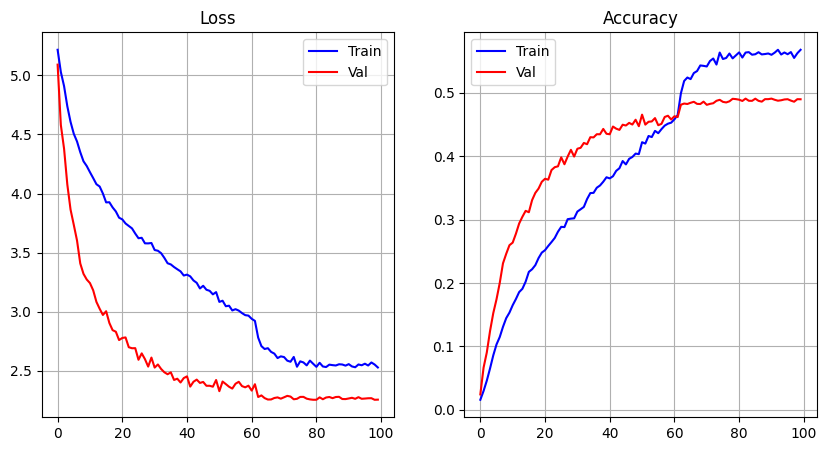

In [166]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(EpochMean(tr_loss_log), c='b', label = 'Train',ax = ax[0])
sns.lineplot(EpochMean(val_loss_log), c = 'r', label = 'Val', ax = ax[0])

sns.lineplot(EpochMean(tr_acc_log), c='b', label = 'Train',ax = ax[1])
sns.lineplot(EpochMean(val_acc_log), c = 'r', label = 'Val', ax = ax[1])

ax[0].set_title('Loss')
ax[0].legend()
ax[0].grid()

ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].grid()

# Inference
-----

In [123]:
from collections import OrderedDict

net_inf = models.resnet34(weights=None)
net_inf.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
net_inf.maxpool = nn.AdaptiveMaxPool2d((40,40))
net_inf.fc = nn.Sequential(
    nn.Dropout(0.5), 
    nn.Linear(512, 200)
)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net_inf = model.to(device)
net_inf = nn.DataParallel(model, device_ids=[0, 1])


best_result = torch.load(f'/kaggle/working/{best_record}.pth')

new_state_dict = OrderedDict()
for k, v in best_result['model_state_dict'].items():
    new_state_dict['module.' + k] = v
    
net_inf.load_state_dict(new_state_dict)



<All keys matched successfully>

In [125]:
def predict_image_class(image_path):

    net_inf.eval()

    img = Image.open(image_path).convert('RGB')
    preprocess = v2.Compose([
    v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),  
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
])
    img_tensor = preprocess(img).unsqueeze(0)

    with torch.no_grad():
        output = net_inf(img_tensor.to(device))
        pred = output.argmax(axis=-1)

    return pred.item()

scored_sample = pd.read_csv('/kaggle/input/bhw-1-dl-2024-2025/bhw1/sample_submission.csv')

for j, i in tqdm.tqdm(enumerate(scored_sample['Id'])):
  pred = predict_image_class('/kaggle/input/bhw-1-dl-2024-2025/bhw1/test/' + str(i))

  scored_sample.loc[j, 'Category'] = pred

10000it [03:54, 42.62it/s]


In [126]:
scored_sample

,Id,Category
0,test_00000.jpg,100
1,test_00001.jpg,196
2,test_00002.jpg,190
3,test_00003.jpg,175
4,test_00004.jpg,170
...,...,...
9995,test_09995.jpg,121
9996,test_09996.jpg,125
9997,test_09997.jpg,47
9998,test_09998.jpg,85


In [129]:
scored_sample.to_csv('Submission_PARAMONOV.csv', index=False)